___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

In [2]:
df=pd.read_csv("final_scout_dummy.csv")

In [3]:
df1=pd.read_csv("final_scout_not_dummy.csv")

In [4]:
df1

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15911,Renault Espace,Van,39885,VAT deductible,9900.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400
15912,Renault Espace,Van,39875,VAT deductible,15.000,Pre-registered,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,146.000,1,Metallic,Part/Full Leather,Automatic,1997.000,1734.000,front,5.300
15913,Renault Espace,Van,39700,VAT deductible,10.000,Pre-registered,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300


In [5]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,...,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,Type_Demonstration,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,...,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0


In [6]:
df1.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


<AxesSubplot:>

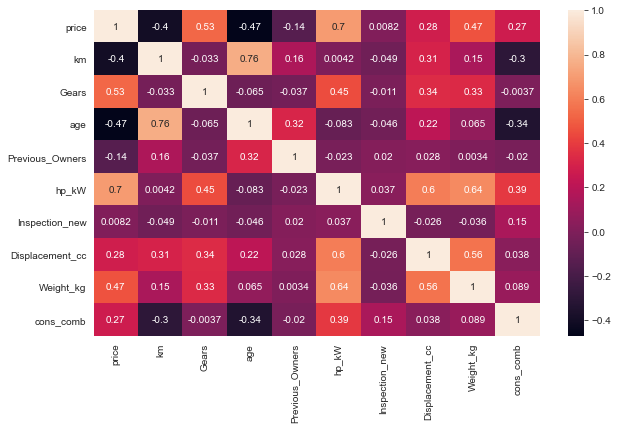

In [7]:
sns.heatmap(df1.corr(),annot=True)

In [8]:
df.corr().loc[:,"price"].sort_values()

age                                        -0.473
Gearing_Type_Manual                        -0.432
km                                         -0.399
Upholstery_type_Cloth                      -0.387
make_model_Opel Corsa                      -0.379
Type_Used                                  -0.366
make_model_Renault Clio                    -0.298
body_type_Compact                          -0.202
Drive_chain_front                          -0.156
Previous_Owners                            -0.145
make_model_Opel Astra                      -0.128
em_CD player                               -0.093
vat_Price negotiable                       -0.091
em_On-board computer                       -0.077
ss_Central door lock with remote control   -0.070
ss_Fog lights                              -0.053
Paint_Type_Perl effect                     -0.050
ss_Isofix                                  -0.046
body_type_Sedans                           -0.044
ss_Central door lock                       -0.043


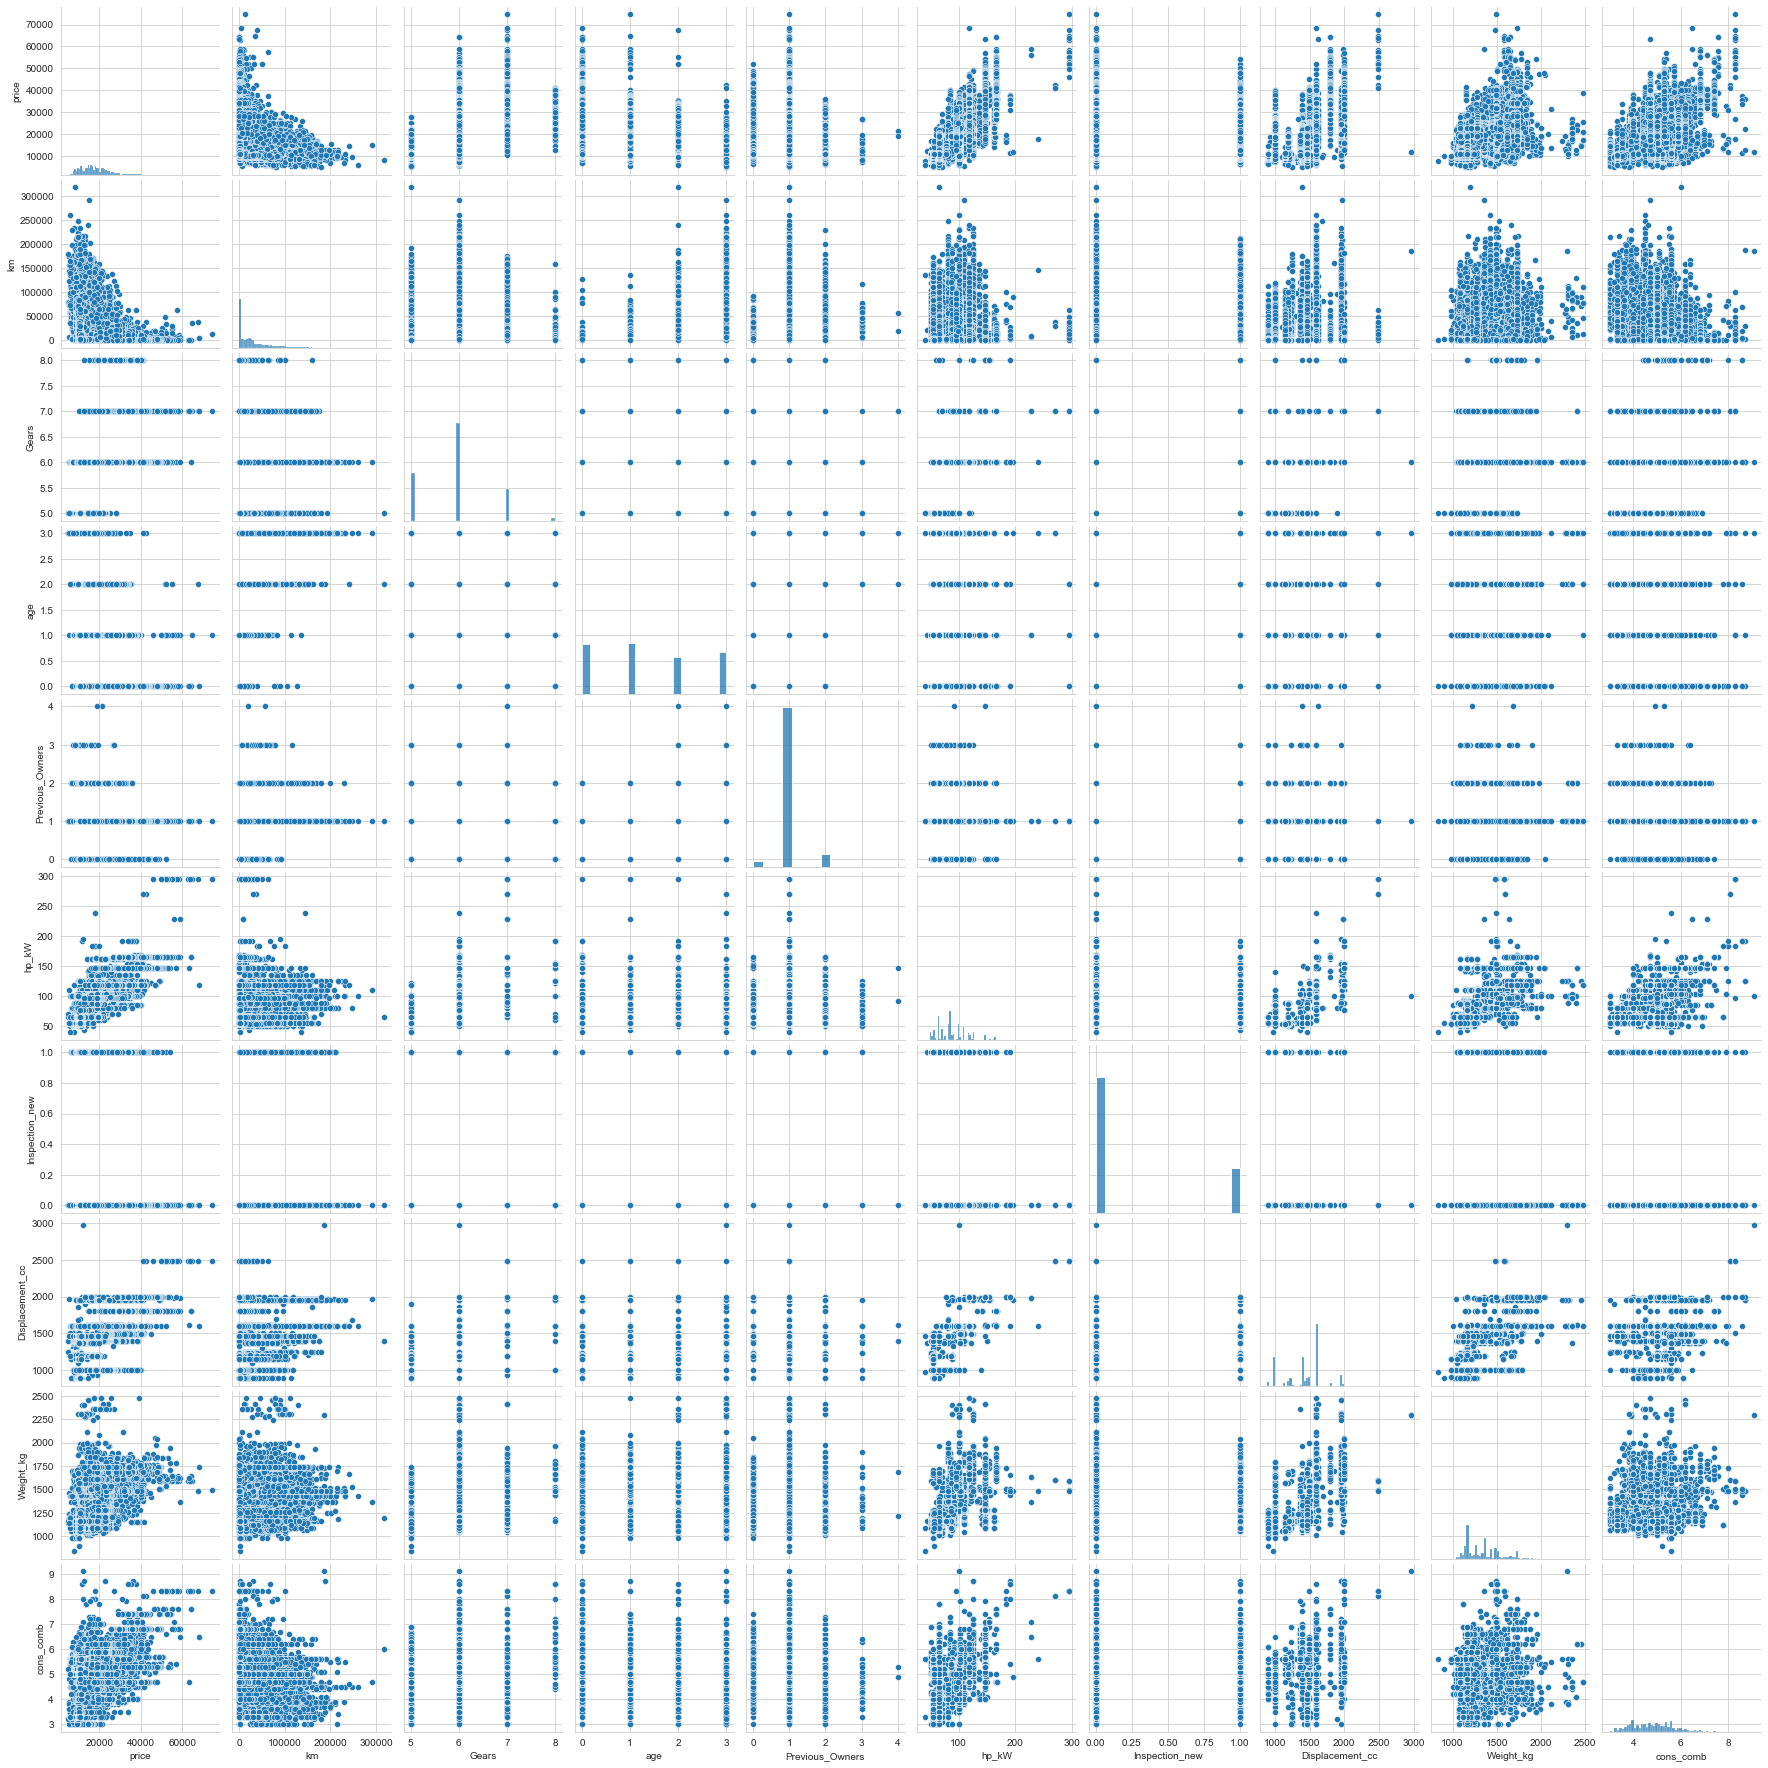

In [9]:
sns.pairplot(df1)

In [10]:
X=df.drop("price",axis=1)
y=df["price"]

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

### Train | Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [13]:
from sklearn.linear_model import LinearRegression

## Cross Validate

In [14]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [15]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.400,0.003,0.877,-1785.001,-6849890.604,-2617.230
2,0.056,0.002,0.889,-1682.499,-5898803.020,-2428.745
3,0.065,0.002,0.876,-1685.555,-6351260.702,-2520.171
4,0.076,0.003,0.890,-1802.037,-7339191.559,-2709.094
5,0.059,0.002,0.887,-1718.532,-6407336.669,-2531.272
6,0.065,0.002,0.888,-1681.595,-5763615.774,-2400.753
7,0.043,0.002,0.895,-1645.746,-5380779.771,-2319.651
8,0.044,0.002,0.879,-1814.747,-7322956.353,-2706.096
9,0.052,0.002,0.892,-1677.095,-5601504.833,-2366.750
10,0.052,0.002,0.898,-1680.673,-5280537.199,-2297.942


In [16]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()


test_r2                                   0.887
test_neg_mean_absolute_error          -1717.348
test_neg_mean_squared_error        -6219587.648
test_neg_root_mean_squared_error      -2489.770
dtype: float64

In [17]:
scores.iloc[:,2:].mean().loc['test_r2']

0.8869936151601792

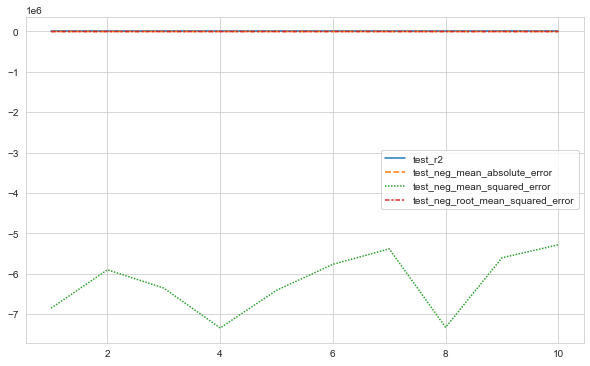

In [18]:
sns.lineplot(data = scores.iloc[:,2:]);

In [19]:
lm_cv_test = {"lm_CV_test": {"rmse" : scores.iloc[:,2:].mean().loc['test_neg_root_mean_squared_error'],
    "mae" : scores.iloc[:,2:].mean().loc['test_neg_mean_absolute_error'],
    "mse" : scores.iloc[:,2:].mean().loc['test_neg_mean_squared_error'],
    "R2" : scores.iloc[:,2:].mean().loc['test_r2']}
             }

lm_cv=pd.DataFrame(lm_cv_test)
lm_cv


,lm_CV_test
R2,0.887
mae,-1717.348
mse,-6219587.648
rmse,-2489.770


In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)


In [22]:
lm_scores = {"lm_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lm_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lms =pd.DataFrame(lm_scores)
lms

,lm_train,lm_test
rmse,2439.399,2479.199
mae,1690.359,1728.891
mse,5950667.338,6146427.481
R2,0.892,0.884


In [23]:
lm.coef_

array([-3.60330053e-02,  6.37405524e+02, -1.60328570e+03,  1.21500754e+02,
        9.28354439e+01, -1.79646534e+02, -9.82224623e-01, -1.17902544e+00,
        1.73248616e+02,  3.46878976e+02, -4.25984852e+02,  2.33766273e+01,
        2.78785746e+02, -1.68902094e+02,  2.78928592e+02,  1.63936420e-10,
       -1.43631886e+02,  6.85681687e+01,  2.58238876e+02,  4.55221579e+02,
        2.31146863e+03,  4.94757505e+02,  1.30535422e+02,  1.87635932e+01,
       -6.65233108e+02,  9.40399406e+01,  8.75119289e+01, -3.14995497e+02,
        3.28699979e+02,  9.48623074e+01,  3.40510952e+02, -3.65980549e+02,
        5.53911466e+02,  1.04413259e+02,  1.09761971e+03,  2.29063184e+02,
       -4.32639810e+02,  5.58347661e+01, -2.20424446e+02, -3.20697616e+01,
        8.17872900e+02, -2.25493252e+02, -5.40618335e+01,  7.58732205e+02,
        9.57839460e+00, -7.18502969e+02,  3.77914514e+02, -5.64053733e+02,
        6.91488588e+01,  7.97621877e+02,  7.10022491e+01,  5.76181236e+01,
       -2.73082255e+00,  

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [24]:
from sklearn.linear_model import Ridge

In [25]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
y_train_pred = ridge_model.predict(X_train)

In [26]:
ridge_scores = {"ridge_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rs = pd.DataFrame(ridge_scores)
rs

,ridge_train,ridge_test
rmse,2440.141,2474.721
mae,1691.290,1728.066
mse,5954288.826,6124244.364
R2,0.892,0.885


In [27]:
from sklearn.linear_model import RidgeCV

In [28]:
alpha_space = np.linspace(0.01, 1, 100)

In [29]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")

In [30]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [31]:
ridge_cv_model.alpha_

1.0

In [32]:
y_pred = ridge_cv_model.predict(X_test)

In [33]:
ridge_cv_scores = {"ridge_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "ridge_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rcs = pd.DataFrame(ridge_cv_scores)
rcs

,ridge_cv_train,ridge_cv_test
rmse,2440.141,2474.721
mae,1691.290,1728.066
mse,5954288.826,6124244.364
R2,0.892,0.885


In [34]:
pd.concat([rs, rcs], axis = 1)

,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
rmse,2440.141,2474.721,2440.141,2474.721
mae,1691.290,1728.066,1691.290,1728.066
mse,5954288.826,6124244.364,5954288.826,6124244.364
R2,0.892,0.885,0.892,0.885


## 5. Implement Lasso Regression

In [35]:
from sklearn.linear_model import Lasso, LassoCV

In [36]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

In [37]:
y_train_pred = lasso_model.predict(X_train)

In [38]:
lasso_scores = {"lasso_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lss = pd.DataFrame(lasso_scores)
lss

,lasso_train,lasso_test
rmse,2444.273,2474.721
mae,1692.629,1728.066
mse,5974471.620,6124244.364
R2,0.891,0.885


In [39]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [40]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.877,-1787.889,-6841772.570,-2615.678
2,0.890,-1678.085,-5868554.368,-2422.510
3,0.876,-1684.925,-6334955.231,-2516.934
4,0.889,-1800.427,-7374020.441,-2715.515
5,0.889,-1712.858,-6295803.128,-2509.144
6,0.889,-1678.102,-5681155.956,-2383.518
7,0.894,-1648.740,-5439898.448,-2332.359
8,0.879,-1813.375,-7358532.141,-2712.661
9,0.891,-1679.438,-5634807.342,-2373.775
10,0.899,-1676.672,-5231912.653,-2287.337


<AxesSubplot:>

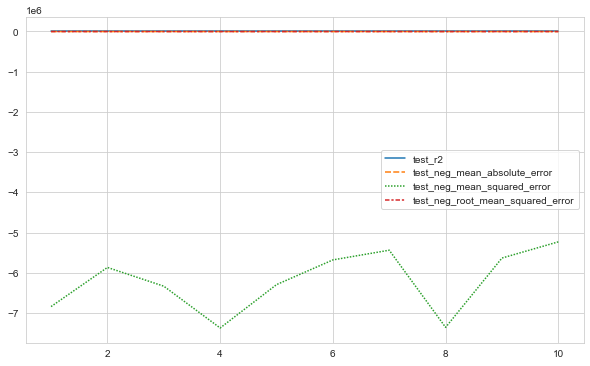

In [41]:
sns.lineplot(data = scores.iloc[:,2:])

In [42]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.887
test_neg_mean_absolute_error          -1716.051
test_neg_mean_squared_error        -6206141.228
test_neg_root_mean_squared_error      -2486.943
dtype: float64

In [43]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [45]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter = 100000)

In [46]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=100000)

In [47]:
lasso_cv_model.alpha_

0.9

In [48]:
lasso_cv_scores = {"lasso_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "lasso_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lcs = pd.DataFrame(lasso_cv_scores)
lcs

,lasso_cv_train,lasso_cv_test
rmse,2444.273,2474.721
mae,1692.629,1728.066
mse,5974471.620,6124244.364
R2,0.891,0.885


In [49]:
a = pd.Series(lasso_cv_model.coef_)

In [50]:
len(a[a==0])

24

In [51]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [52]:
lcm_df

,lasso_cv_coef_0.01
0,-0.036
1,638.548
2,-1604.427
3,119.616
4,94.125
5,-171.971
6,-1.019
7,-1.098
8,174.476
9,333.834


- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [53]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [54]:
elastic_model = ElasticNet()
elastic_model.fit(X_train, y_train)

ElasticNet()

In [55]:
elastic_model.l1_ratio

0.5

In [56]:
elastic_model.alpha

1.0

In [57]:
elastic_scores = {"elastic_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
es = pd.DataFrame(elastic_scores)
es

,elastic_train,elastic_test
rmse,2444.273,2474.721
mae,1692.629,1728.066
mse,5974471.620,6124244.364
R2,0.891,0.885


In [58]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, max_iter = 100000)

In [59]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000)

In [60]:
elastic_cv_model.alpha_

0.9

In [61]:
elastic_cv_model.l1_ratio_

1.0

In [62]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [63]:
elastic_cv_scores = {"elastic_cv_train": {"rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)}, 

    "elastic_cv_test": {"rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
ecs = pd.DataFrame(elastic_cv_scores)
ecs

,elastic_cv_train,elastic_cv_test
rmse,2444.273,2474.721
mae,1692.629,1728.066
mse,5974471.620,6124244.364
R2,0.891,0.885


## 7. Visually Compare Models Performance In a Graph

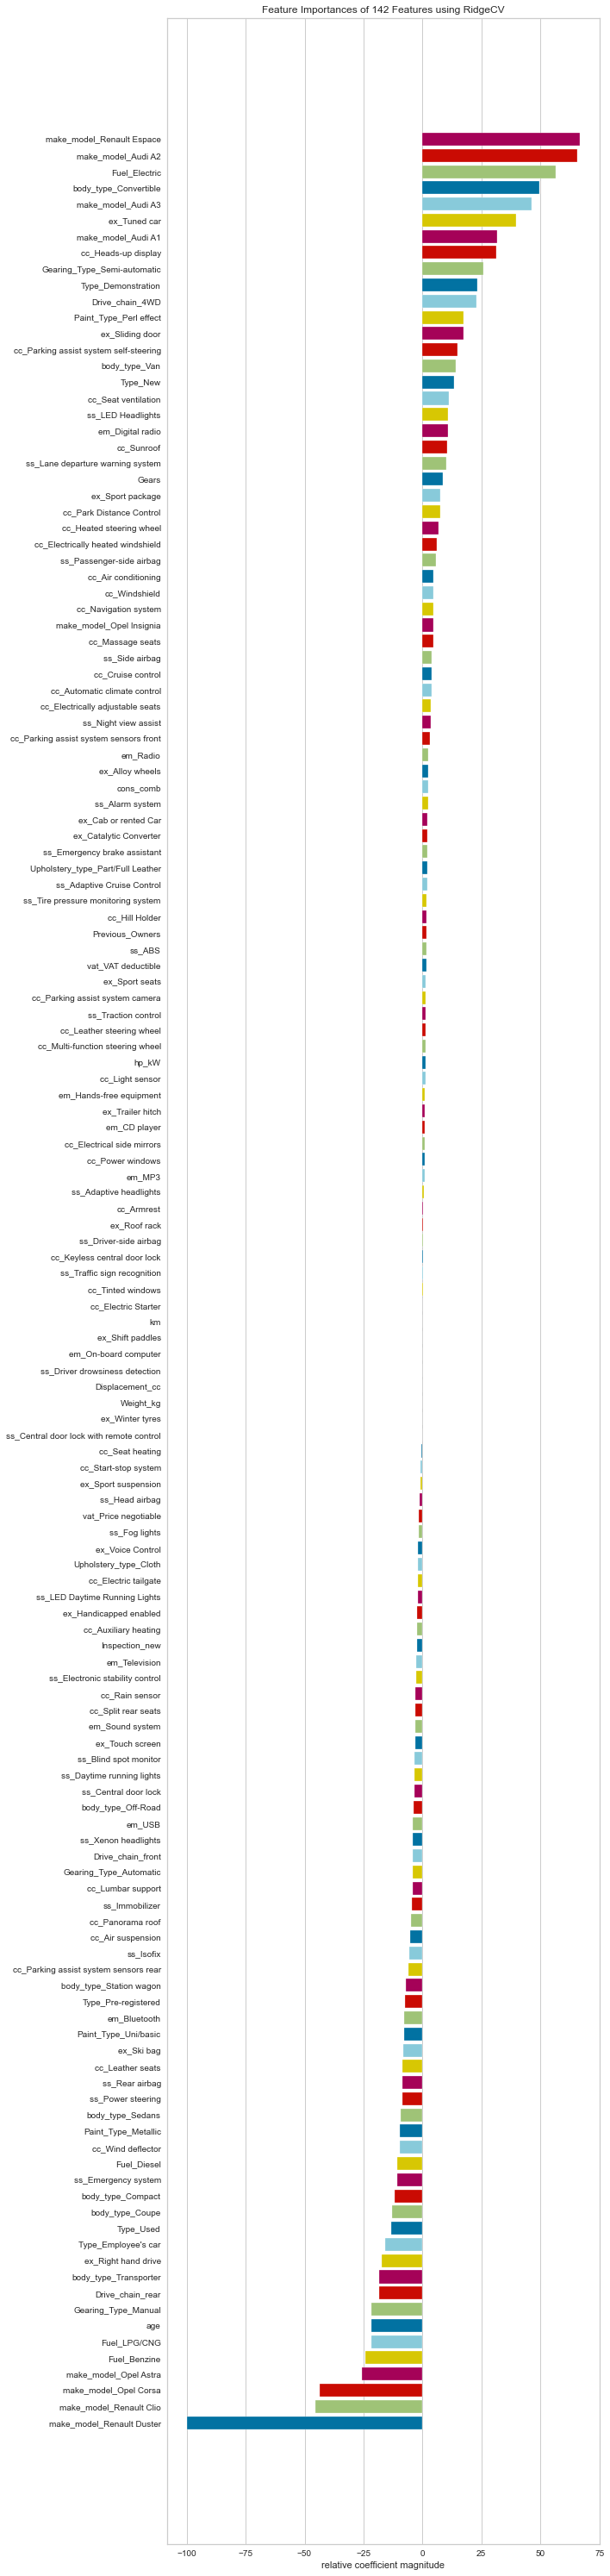

<AxesSubplot:title={'center':'Feature Importances of 142 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [64]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

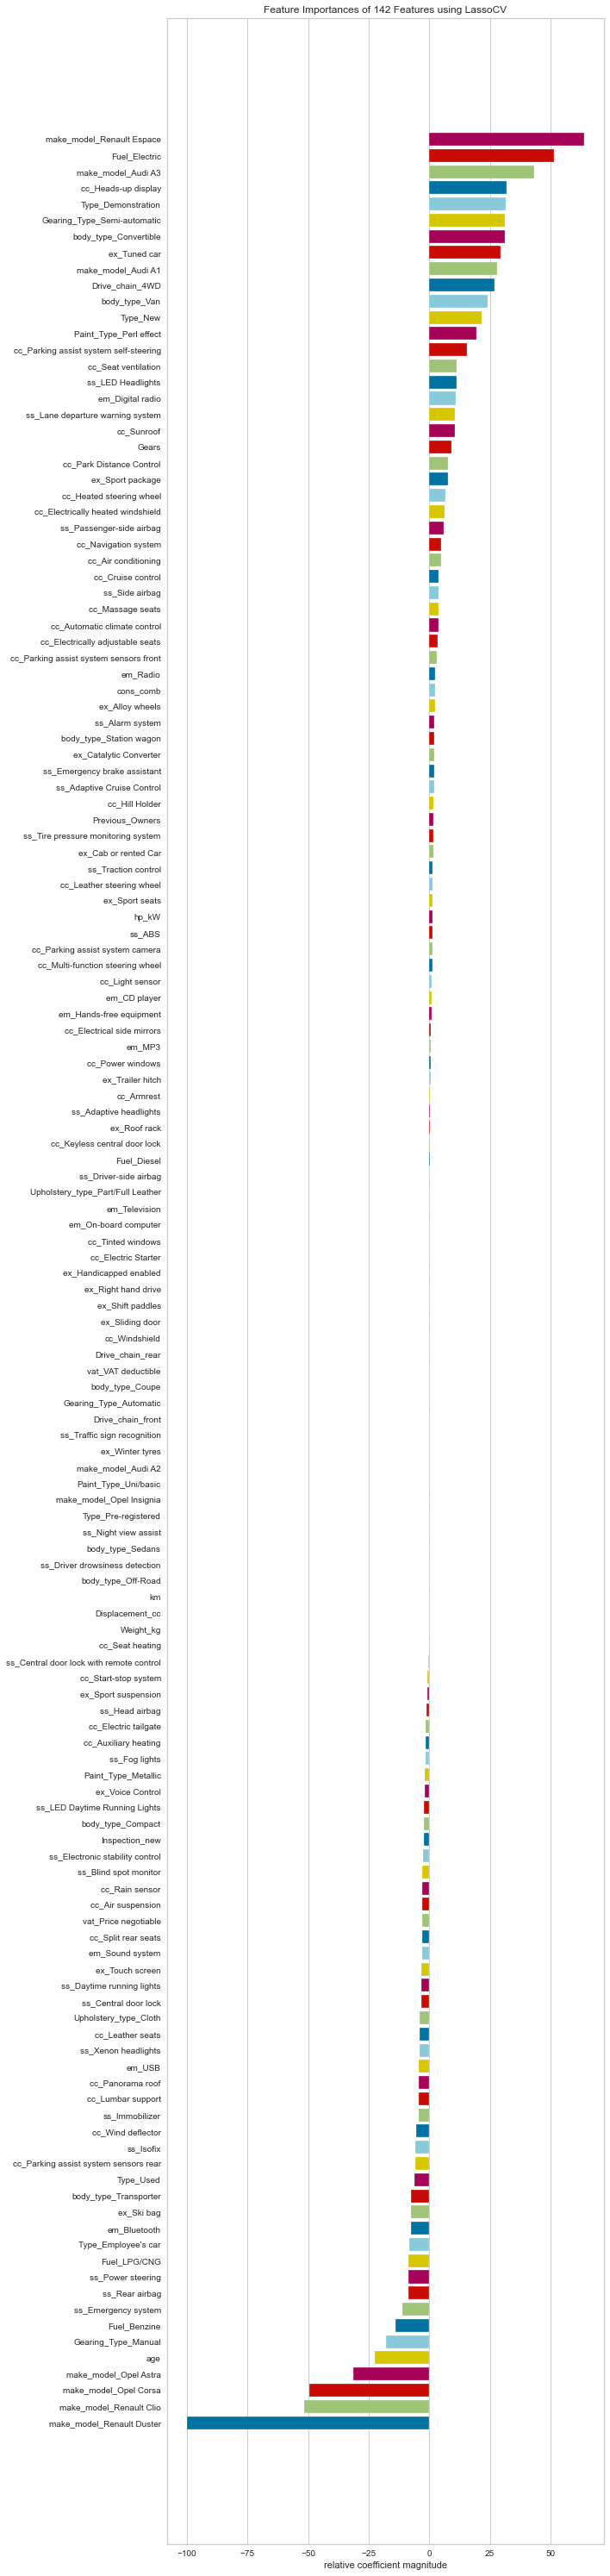

<AxesSubplot:title={'center':'Feature Importances of 142 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [65]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rf = RandomForestRegressor()

In [68]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [69]:
y_pred = rf.predict(X_test)

In [70]:
y_pred_train = rf.predict(X_train)

In [71]:
r2_score(y_test, y_pred)

0.9534318519743318

In [73]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
random_grid = {'n_estimators': n_estimators}

In [74]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [78]:
from sklearn.model_selection import GridSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(estimator = rf, param_grid=random_grid,verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

0.9526820284703074